In [10]:
import segyio
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import ricker

C:\Users\cco\AppData\Local\Temp\ipykernel_26692\990479753.py:7: DeprecationWarning: scipy.signal.ricker is deprecated in SciPy 1.12 and will be removed
in SciPy 1.15. We recommend using PyWavelets instead.

  wavelet = ricker(points=250, a=20)  # Ricker wavelet to simulate seismic wavelet


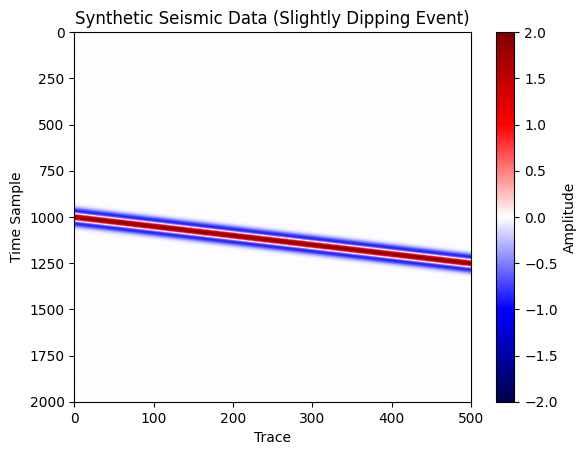

In [17]:
# SYNTHETIC SEISMIC DATA (SINGLE HORIZON/EVENT)

# Seismic data parameters
n_rows, n_cols = 2000, 500  # Number of rows (time/depth) and columns (trace locations)
dip = 0.5  # Dip of the event in sample points per trace
amplitude = 10  # Amplitude of the event
wavelet = ricker(points=250, a=20)  # Ricker wavelet to simulate seismic wavelet

# Synthetic data
seismic_data = np.zeros((n_rows, n_cols))

# Dipping event
event_center = 1000
for col in range(n_cols):
    shift = int(dip * col)  # Linear shift due to dipping
    seismic_data[event_center + shift, col] = amplitude

# Convolution with Ricker wavelet
for col in range(n_cols):
    seismic_data[:, col] = np.convolve(seismic_data[:, col], wavelet, mode='same')

# Plot
plt.imshow(seismic_data, cmap='seismic', aspect='auto', extent=[0, n_cols, n_rows, 0], vmin=-2, vmax=2)
plt.title("Synthetic Seismic Data (Slightly Dipping Event)")
plt.xlabel("Trace")
plt.ylabel("Time Sample")
plt.colorbar(label="Amplitude")
plt.show()

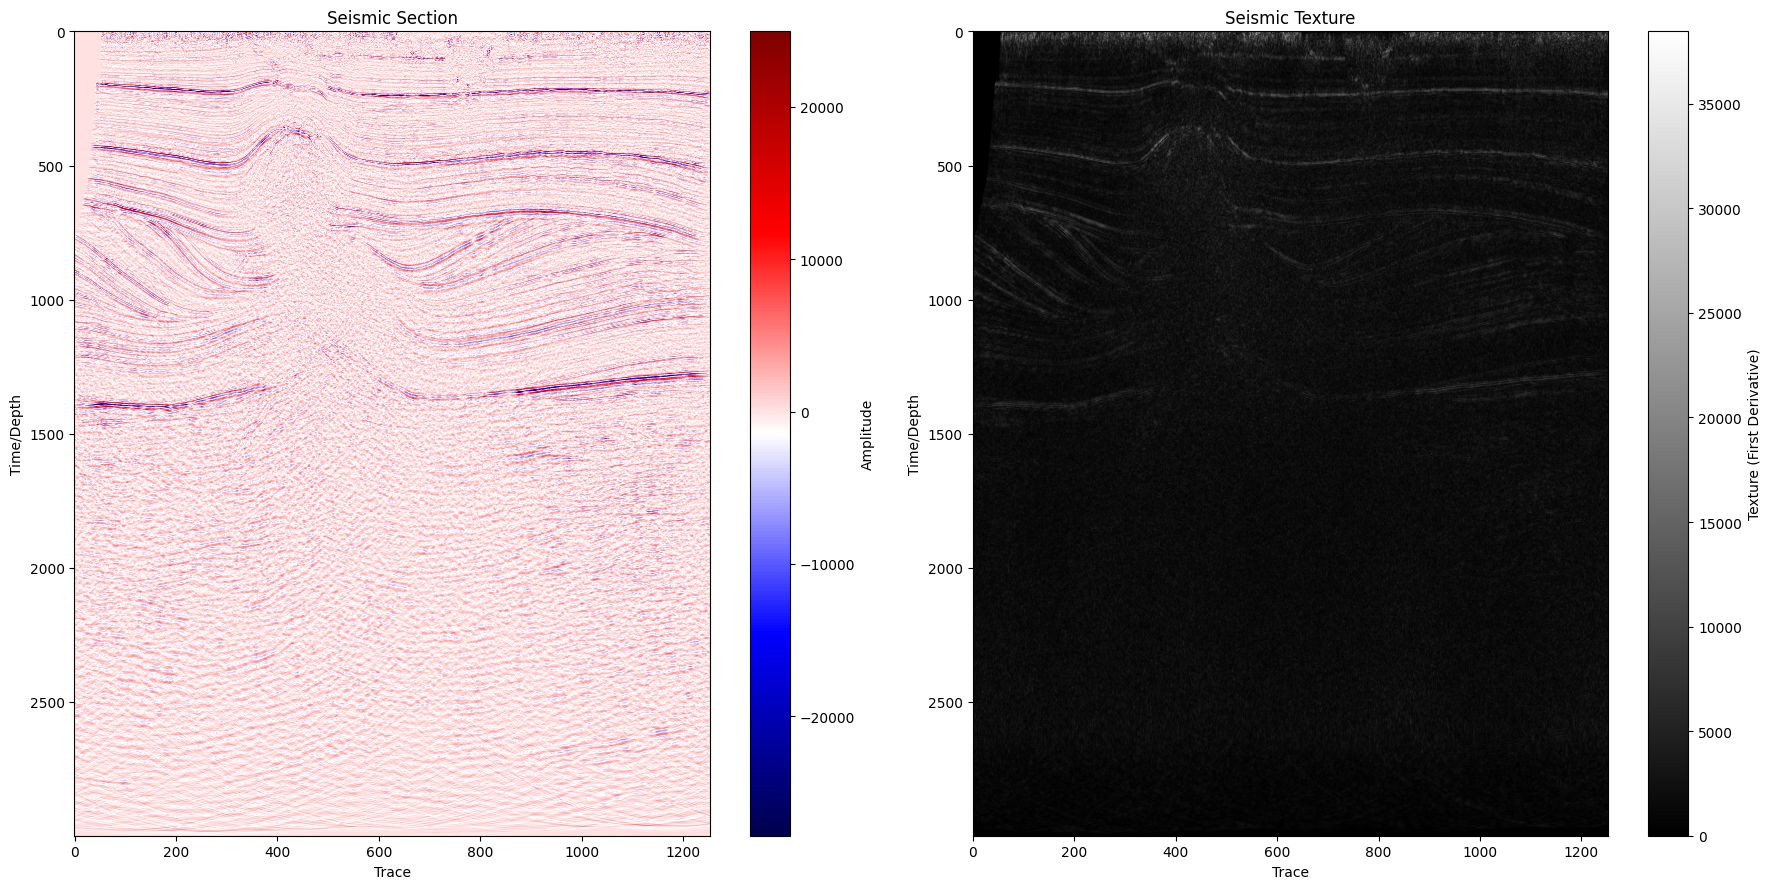

In [8]:
# SEISMIC ATTRIBUTES - TEXTURE

# Read SEG-Y file iv available
def read_segy_file(file_path):
    with segyio.open(file_path, "r", ignore_geometry=True) as segyfile:
        segyfile.mmap()
        seismic_data = segyfile.trace.raw[:]
    return seismic_data

# Plot of input seismic section
def plot_seismic_section(seismic_data):
    plt.figure(figsize=(18, 9))  # Adjusted the figure size for side-by-side plotting
    plt.subplot(1, 2, 1)  # First subplot
    plt.imshow(seismic_data, cmap="seismic", aspect='auto')
    plt.colorbar(label="Amplitude")
    plt.title("Seismic Section")
    plt.xlabel("Trace")
    plt.ylabel("Time/Depth")

# Texture computation with first derivative
def compute_texture_manual(seismic_data):
    # Compute first derivative in the time direction (axis 0) and trace direction (axis 1)
    texture_time = np.diff(seismic_data, axis=0, prepend=0)
    texture_trace = np.diff(seismic_data, axis=1, prepend=0)
    # Combine both derivatives to represent texture (e.g., sum of absolute values)
    texture = np.abs(texture_time) + np.abs(texture_trace)
    return texture

# Plot of texture attribute
def plot_texture(texture_data):
    plt.subplot(1, 2, 2)  # Second subplot
    plt.imshow(texture_data, cmap="gray", aspect='auto')
    plt.colorbar(label="Texture (First Derivative)")
    plt.title("Seismic Texture")
    plt.xlabel("Trace")
    plt.ylabel("Time/Depth")
    plt.tight_layout()
    plt.show()


# Path to SEG-Y file (if available)
#file_path = 'path to SEG-Y file'

# Activate if SEG-Y file is available and read
#seismic_data = read_segy_file(file_path)

# Plot of input seismic
plot_seismic_section(seismic_data.T)

# Texture attribute computation
texture = compute_texture_manual(seismic_data)

# Plot of texture result
plot_texture(texture.T)
